In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os

from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/'
data_path2 = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/Previous/df2022_WiClass.csv'

In [9]:
a = pd.read_csv(data_path2)
a.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,Class
0,12.0,1.0,b'02222022',b'02',b'22',b'2022',1100.0,b'2022000244',2.022000e+09,1.0,...,NaN,1.0,3.000000e+00,1.0,2.300000e+01,1.0,1.0,9.0,2.0,Mild CD
1,12.0,1.0,b'02242022',b'02',b'24',b'2022',1100.0,b'2022000245',2.022000e+09,1.0,...,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0,No CD
2,12.0,1.0,b'02202022',b'02',b'20',b'2022',1100.0,b'2022000246',2.022000e+09,1.0,...,NaN,1.0,3.000000e+00,1.0,2.300000e+01,1.0,1.0,1.0,2.0,Mild CD
3,12.0,1.0,b'03032022',b'03',b'03',b'2022',1100.0,b'2022000247',2.022000e+09,1.0,...,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,No CD
4,12.0,1.0,b'02242022',b'02',b'24',b'2022',1100.0,b'2022000248',2.022000e+09,1.0,...,NaN,1.0,3.000000e+00,1.0,4.700000e+01,1.0,1.0,1.0,1.0,No CD


In [14]:
7003+56943+474

64420

In [8]:
a = a[['CIMEMLOS', 'CDHOUSE', 'CDASSIST','CDSOCIAL', 'CDDISCUS']]
a.fillna(6, inplace=True)
a.head()
a.to_csv('df2022.csv', index=True)

In [ ]:
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/df2022_WiClass.csv')
Features = ['COVIDVA1', 'COVACGET', 'CNCRAGE', 'CSRVPAIN', 'PSATEST1', 'PSATIME1', 'PCSTALK1', 'CRGVHRS1', 'CRGVALZD',
            'ACEDEPRS', 'ACEDRUGS', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX', 'ACEADSAF', 'ACEADNED',
            'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHBILLS', 'SDHUTILS',  'Class']
Features2 = ['COLGSEX1', 'HHADULT', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINSR', 'MEDCOST1', 'EXERANY2', 'LASTDEN4',
             'RMVTETH4', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD3', 'ADDEPEV3', 'HAVARTH4', 'EDUCA', 'RENTHOM1', 'EMPLOY1', 'INCOME3',
             'WEIGHT2', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'CRVCLHPV', 'SIGMTES1', 'VIRCOLO1', 'SDNATES1',
             'SMOKDAY2', 'LCSFIRST', 'LCSLAST', 'LCSCTSC1', 'AVEDRNK3', 'HIVTST7', 'COVIDSMP', 'COVIDPRM', 'INSULIN1', 'FEETSORE',
             'COVIDVA1', 'COVACGET', 'CNCRAGE', 'CSRVPAIN', 'PSATEST1', 'PSATIME1', 'PCSTALK1', 'CRGVHRS1', 'CRGVALZD', 'ACEDEPRS',
             'ACEDRUGS', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEHVSEX', 'ACEADSAF', 'ACEADNED', 'LSATISFY', 'EMTSUPRT',
             'SDHISOLT', 'SDHEMPLY', 'FOODSTMP', 'SDHFOOD1', 'SDHBILLS', 'SDHUTILS', 'SDHTRNSP', 'SDHSTRE1', 'MARIJAN1', 'MENTCIGS',
             'MENTECIG', 'HEATTBCO', 'ASBIBING', 'ASBIADVC', 'ASBIRDUC', 'FIREARM5', 'GUNLOAD', 'RCSXBRTH', 'CASTHNO2', 'PFPPRVN4',
             'TYPCNTR9', 'BRTHCNT4', 'WHEREGET', 'NOBCUSE8', 'RRTREAT', 'RRHCARE4', 'RRPHYSM2', '_RFHLTH', '_PHYS14D', '_MENT14D',
             '_TOTINDA', '_EXTETH3', '_ALTETH3', '_DENVST3', '_LTASTH1', '_CASTHM1', '_ASTHMS1', '_DRDXAR2', '_RACEG22', '_AGEG5YR',
             '_AGE65YR', '_AGE_G', 'WTKG3', '_EDUCAG', '_INCOMG1', '_RFMAM22', '_MAM5023', '_SMOKER3', '_RFSMOK3', '_PACKDAY',
             'DRNKANY6', '_DRNKWK2', '_AIDTST4', 'Class']
df = df_full[Features]
df2 = df_full[Features2]

In [ ]:
def check_nans(df):
  nans = []
  for feature in df.columns:
    print(f'There are {df[feature].isna().sum()} missing values in {feature}')
    nans.append(df[feature].isna().sum())
  # return nans

In [ ]:
def process_df(df):
  for feature in df.columns:
    if df[feature].isna().sum() > 30000:
      df = df.drop(feature, axis=1)
  return df

In [ ]:
df_v1 = process_df(df)

In [ ]:
# def ToOrdinal(df, column_name, Never=8, Never_to_0=True):
#   df2 = df.copy()
#   df2[column_name] = df2[column_name].astype(int)
#   if Never:
#     if Never_to_0:
#       df2[column_name].replace(Never, 0, inplace=True)
#     else:
#       Never_to = df2[column_name].value_counts().sort_index(ascending=False).index[0]+1
#       df2[column_name].replace(Never, Never_to, inplace=True)

#   return df2

def ToBinary(test_df, column_name, inf_replacement=7, nan_replacement=7):
    test_df2 = test_df.copy()
    test_df2[column_name] = test_df2[column_name].fillna(nan_replacement)  # Replace NaN values with specified value
    test_df2[column_name] = test_df2[column_name].replace([np.inf, -np.inf], inf_replacement)  # Replace inf values with specified value
    test_df2[column_name] = test_df2[column_name].astype(int)
    test_df2[column_name].replace(2, 0, inplace=True)
    print(test_df2[column_name].unique())
    return test_df2

def ToNominal(df, column_name, categories):
  df2 = df.copy()
  df2[column_name].fillna(10000, inplace=True)
  column_keys = df2[column_name].value_counts().index.tolist()
  column_keys.sort()

  mapping = {column_keys[i]: categories[i] for i in range(len(column_keys))}
  df2[column_name] = df2[column_name].map(mapping)
  return df2

def OneHotEncoding(df, columns):
  df2 = df.copy()
  for column in columns:
    one_hot_encoding = pd.get_dummies(df2[column], dtype='int')
    df2 = pd.concat([df2, one_hot_encoding], axis=1)
    df2.drop(columns=[column], inplace = True)
    if 'Missing' in df2.columns:
      df2.drop(columns=['Missing'], inplace = True)

  return df2

In [ ]:
check_nans(df_v1)

There are 10861 missing values in LSATISFY
There are 10926 missing values in EMTSUPRT
There are 10992 missing values in SDHISOLT
There are 11040 missing values in SDHEMPLY
There are 11094 missing values in FOODSTMP
There are 11159 missing values in SDHFOOD1
There are 11208 missing values in SDHBILLS
There are 11251 missing values in SDHUTILS
There are 0 missing values in Class


[10861, 10926, 10992, 11040, 11094, 11159, 11208, 11251, 0]

In [ ]:
df_v1 = ToNominal(df_v1, 'LSATISFY', ['Very satisfied', 'Satisfied', 'Dissatisfied', 'Very Dissatisfied',
                                      'Missing', 'Missing', 'Missing'])
df_v1 = ToBinary(df_v1, 'SDHEMPLY')
df_v1 = ToBinary(df_v1, 'FOODSTMP')
df_v1 = ToBinary(df_v1, 'SDHBILLS')
df_v1 = ToBinary(df_v1, 'SDHUTILS')

[0 1 9 7]
[0 1 7 9]
[0 7 1 9]
[0 1 7 9]


In [ ]:
check_nans(df_v1)

There are 0 missing values in LSATISFY
There are 10926 missing values in EMTSUPRT
There are 10992 missing values in SDHISOLT
There are 0 missing values in SDHEMPLY
There are 0 missing values in FOODSTMP
There are 11159 missing values in SDHFOOD1
There are 0 missing values in SDHBILLS
There are 0 missing values in SDHUTILS
There are 0 missing values in Class


[0, 10926, 10992, 0, 0, 11159, 0, 0, 0]

In [ ]:
def Impute(df, column_name, Unknown=7, Missing=9):
  df2 = df.copy()

  mode = df2[column_name].mode()[0]
  df2[column_name].replace([Unknown, Missing], mode, inplace=True)
  df2[column_name].fillna(mode, inplace=True)

  return df2

In [ ]:
df_v1 = Impute(df_v1, 'EMTSUPRT')
df_v1 = Impute(df_v1, 'SDHISOLT')
df_v1 = Impute(df_v1, 'SDHEMPLY')
df_v1 = Impute(df_v1, 'FOODSTMP')
df_v1 = Impute(df_v1, 'SDHFOOD1')
df_v1 = Impute(df_v1, 'SDHBILLS')
df_v1 = Impute(df_v1, 'SDHUTILS')

In [ ]:
for column in df_v1.columns:
  print(column, df_v1[column].unique())

LSATISFY ['Very satisfied' 'Satisfied' 'Dissatisfied' 'Missing' 'Very Dissatisfied']
EMTSUPRT [1. 3. 2. 5. 4.]
SDHISOLT [5. 4. 3. 2. 1.]
SDHEMPLY [0 1]
FOODSTMP [0 1]
SDHFOOD1 [5. 3. 1. 4. 2.]
SDHBILLS [0 1]
SDHUTILS [0 1]
Class ['Mild CD' 'No CD' 'Moderate CD' 'Severe CD']


In [ ]:
df_v2 = OneHotEncoding(df_v1, ['LSATISFY'])
df_v2

In [ ]:
df_v2.head()

,EMTSUPRT,SDHISOLT,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,Class,Dissatisfied,Satisfied,Very Dissatisfied,Very satisfied
0,1.0,5.0,0,0,5.0,0,0,Mild CD,0,0,0,1
1,1.0,4.0,1,0,5.0,0,1,No CD,0,0,0,1
2,3.0,4.0,0,0,5.0,0,0,Mild CD,0,0,0,1
3,1.0,5.0,0,0,5.0,0,0,No CD,0,0,0,1
4,2.0,4.0,0,0,5.0,0,0,No CD,0,1,0,0


In [ ]:
df_v2.to_csv(data_path+'Xinya.csv', index=True)

In [ ]:
! pip install kmodes

In [ ]:
from kmodes.kmodes import KModes
# Generate random categorical data
X = np.random.choice(4, (100, 5))
# Perform K-Modes clustering
kmodes = KModes(n_clusters=3)
clusters = kmodes.fit_predict(X)
# Print the results
print(clusters)


[0 2 0 1 0 2 1 0 2 0 0 0 1 0 0 1 1 2 0 0 2 1 1 0 1 2 0 1 1 1 1 0 0 0 2 0 1
 1 0 0 2 2 1 0 0 1 2 0 0 1 1 2 2 1 1 1 1 0 2 0 0 0 0 0 1 1 1 2 0 0 2 0 2 0
 0 0 0 1 0 0 0 0 2 0 1 0 0 0 1 1 0 1 2 1 0 1 2 0 2 0]


In [ ]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2, pvalue, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
#@title Function for binary variable exploration
def explore_binary(df, feature, include_refused=False):
  print(f'There are {df[feature].isna().sum()} missing values, {np.sum(df[feature]==7)} not sure, {np.sum(df[feature]==9)} refused')
  if np.sum(~df[feature].isna()) == 0:
    print("No valid information")
  else:
    subdf = df[[feature, 'Class']]
    subdf['Binary Classification'] = subdf['Class'].replace({'Mild CD':'CD', 'Moderate CD':'CD', 'Severe CD':'CD'})
    if not include_refused:
      subdf = subdf[(subdf[feature] == 1) | (subdf[feature] == 2)]
      subdf[feature] = subdf[feature].replace({1:'Yes', 2: 'No'})

      desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
      grouped = subdf.groupby([feature, 'Class']).size().unstack()
      grouped = grouped[desired_order]
      frequencies = grouped.div(grouped.sum(axis=1), axis=0)

      desired_order2 = ['CD', 'No CD']
      grouped2 = subdf.groupby([feature, 'Binary Classification']).size().unstack()
      grouped2 = grouped2[desired_order2]
      frequencies2 = grouped2.div(grouped2.sum(axis=1), axis=0)

      idx_order = ['Yes', 'No']
      frequencies.reindex(idx_order)
      frequencies2.reindex(idx_order)

      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

      frequencies.plot(kind='bar', width=0.35, ax=axes[0])
      axes[0].set_xlabel(f'{feature}', fontsize=12)
      axes[0].set_ylabel('Distribution', fontsize=12)
      axes[0].set_title(f'Distribution of CD Classes by {feature}', fontsize=14)
      axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')
      axes[0].set_xticklabels(idx_order, rotation=0)

      frequencies2.plot(kind='bar', width=0.35, ax=axes[1])
      axes[1].set_xlabel(f'{feature}', fontsize=12)
      axes[1].set_ylabel('Distribution', fontsize=12)
      axes[1].set_title(f'Binary CD by {feature}', fontsize=14)
      axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')
      axes[1].set_xticklabels(idx_order, rotation=0)

      # Show plot
      plt.tight_layout()
      plt.show()

      cv1 = cramers_v(subdf[~(subdf['Class']=='No CD')][feature], subdf[~(subdf['Class']=='No CD')]['Class'])
      print(f'Cramers V for multi-class classification is: {cv1}')

      cv2 = cramers_v(subdf[feature], subdf['Binary Classification'])
      print(f'Cramers V for binary classification is: {cv2}')

    else:
      subdf = subdf[(subdf[feature] == 1) | (subdf[feature] == 2)| (subdf[feature] == 7)| (subdf[feature] == 9)]
      subdf[feature] = subdf[feature].replace({1:'Yes', 2: 'No', 7: 'Not Sure', 9: 'Refused'})

      desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
      grouped = subdf.groupby([feature, 'Class']).size().unstack()
      grouped.fillna(0, inplace=True)
      grouped = grouped[desired_order]
      frequencies = grouped.div(grouped.sum(axis=1), axis=0)

      desired_order2 = ['CD', 'No CD']
      grouped2 = subdf.groupby([feature, 'Binary Classification']).size().unstack()
      grouped2 = grouped2[desired_order2]
      frequencies2 = grouped2.div(grouped2.sum(axis=1), axis=0)

      idx_order = ['Yes', 'No', 'Not Sure', 'Refused']
      frequencies.reindex(idx_order)
      frequencies2.reindex(idx_order)

      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

      frequencies.plot(kind='bar', width=0.35, ax=axes[0])
      axes[0].set_xlabel(f'{feature}', fontsize=12)
      axes[0].set_ylabel('Distribution', fontsize=12)
      axes[0].set_title(f'Distribution of CD Classes by {feature}', fontsize=14)
      axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')
      axes[0].set_xticklabels(idx_order, rotation=0)

      frequencies2.plot(kind='bar', width=0.35, ax=axes[1])
      axes[1].set_xlabel(f'{feature}', fontsize=12)
      axes[1].set_ylabel('Distribution', fontsize=12)
      axes[1].set_title(f'Binary CD by {feature}', fontsize=14)
      axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')
      axes[1].set_xticklabels(idx_order, rotation=0)

      # Show plot
      plt.tight_layout()
      plt.show()

      cv1 = cramers_v(subdf[~(subdf['Class']=='No CD')][feature], subdf[~(subdf['Class']=='No CD')]['Class'])
      print(f'Cramers V for multi-class classification is: {cv1}')

      cv2 = cramers_v(subdf[feature], subdf['Binary Classification'])
      print(f'Cramers V for binary classification is: {cv2}')

There are 11251 missing values, 40 not sure, 78 refused


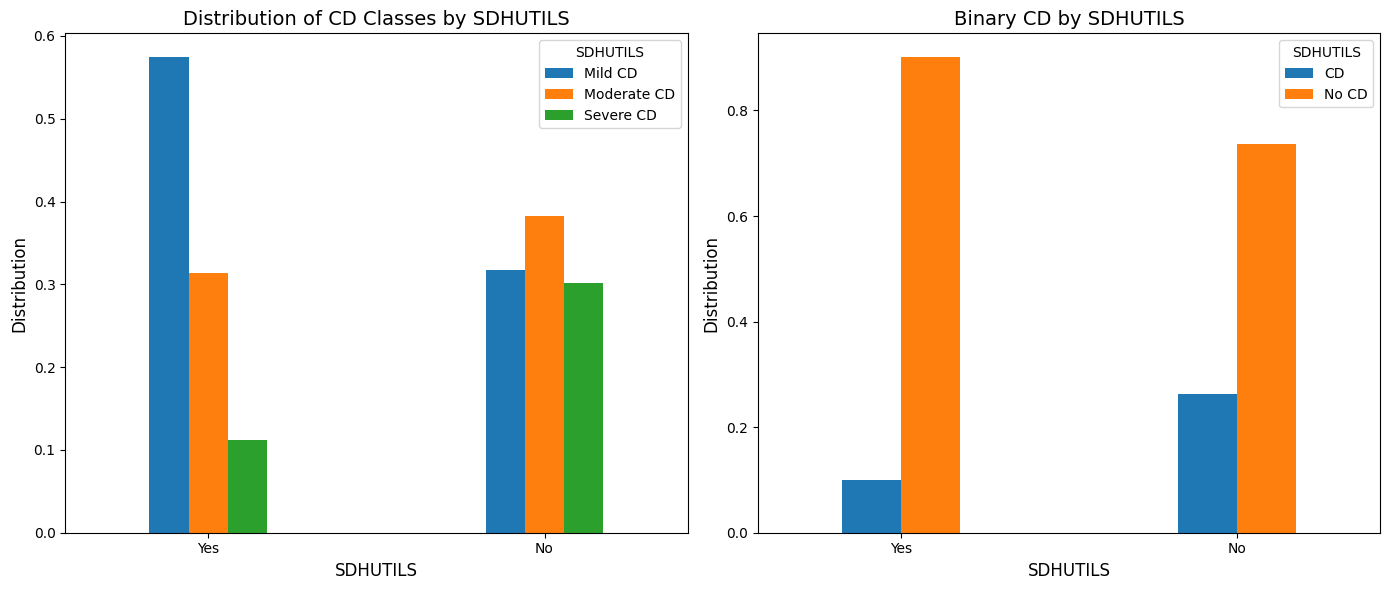

Cramers V for multi-class classification is: 0.1926205948731087
Cramers V for binary classification is: 0.10615836010132466


In [ ]:
explore_binary(df, 'SDHUTILS', include_refused=False)

In [ ]:
#@title Function for categorical variable exploration
# mapping = {1:'Always', 2:"Usually",..., 7:"Not Sure", 9:"Refused"}
def explore_cat(df, feature, mapping, include_refused=False):
  subdf = df[[feature, 'Class']]
  subdf[feature] = subdf[feature].replace(mapping)
  print(f'There are {df[feature].isna().sum()} missing values, {np.sum(subdf[feature]=="Not Sure")} not sure values, {np.sum(subdf[feature]=="Refused")} refused values')
  if np.sum(~df[feature].isna()) == 0:
    print("No valid information")

  else:
    subdf.dropna(subset = [feature], inplace=True)
    subdf['Binary Classification'] = subdf['Class'].replace({'Mild CD':'CD', 'Moderate CD':'CD', 'Severe CD':'CD'})

    if not include_refused:
      subdf = subdf[~((subdf[feature] == 'Not Sure') | (subdf[feature] == 'Refused'))]

      desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
      grouped = subdf.groupby([feature, 'Class']).size().unstack()
      grouped = grouped[desired_order]
      frequencies = grouped.div(grouped.sum(axis=1), axis=0)

      desired_order2 = ['CD', 'No CD']
      grouped2 = subdf.groupby([feature, 'Binary Classification']).size().unstack()
      grouped2 = grouped2[desired_order2]
      frequencies2 = grouped2.div(grouped2.sum(axis=1), axis=0)

      idx_order = list(mapping.values())[:-2]
      frequencies.reindex(idx_order)
      frequencies2.reindex(idx_order)

      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

      frequencies.plot(kind='bar', width=0.35, ax=axes[0])
      axes[0].set_xlabel(f'{feature}', fontsize=12)
      axes[0].set_ylabel('Distribution', fontsize=12)
      axes[0].set_title(f'Distribution of CD Classes by {feature}', fontsize=14)
      axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')
      axes[0].set_xticklabels(idx_order, rotation=0)

      frequencies2.plot(kind='bar', width=0.35, ax=axes[1])
      axes[1].set_xlabel(f'{feature}', fontsize=12)
      axes[1].set_ylabel('Distribution', fontsize=12)
      axes[1].set_title(f'Binary CD by {feature}', fontsize=14)
      axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')
      axes[1].set_xticklabels(idx_order, rotation=0)

      # Show plot
      plt.tight_layout()
      plt.show()

      cv1 = cramers_v(subdf[~(subdf['Class']=='No CD')][feature], subdf[~(subdf['Class']=='No CD')]['Class'])
      print(f'Cramers V for multi-class classification is: {cv1}')

      cv2 = cramers_v(subdf[feature], subdf['Binary Classification'])
      print(f'Cramers V for binary classification is: {cv2}')

    else:
      desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
      grouped = subdf.groupby([feature, 'Class']).size().unstack()
      grouped.fillna(0, inplace=True)
      grouped = grouped[desired_order]
      frequencies = grouped.div(grouped.sum(axis=1), axis=0)

      desired_order2 = ['CD', 'No CD']
      grouped2 = subdf.groupby([feature, 'Binary Classification']).size().unstack()
      grouped2 = grouped2[desired_order2]
      frequencies2 = grouped2.div(grouped2.sum(axis=1), axis=0)

      idx_order = list(mapping.values())
      frequencies.reindex(idx_order)
      frequencies2.reindex(idx_order)

      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

      frequencies.plot(kind='bar', width=0.35, ax=axes[0])
      axes[0].set_xlabel(f'{feature}', fontsize=12)
      axes[0].set_ylabel('Distribution', fontsize=12)
      axes[0].set_title(f'Distribution of CD Classes by {feature}', fontsize=14)
      axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')
      axes[0].set_xticklabels(idx_order, rotation=0)

      frequencies2.plot(kind='bar', width=0.35, ax=axes[1])
      axes[1].set_xlabel(f'{feature}', fontsize=12)
      axes[1].set_ylabel('Distribution', fontsize=12)
      axes[1].set_title(f'Binary CD by {feature}', fontsize=14)
      axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')
      axes[1].set_xticklabels(idx_order, rotation=0)

      # Show plot
      plt.tight_layout()
      plt.show()

      cv1 = cramers_v(subdf[~(subdf['Class']=='No CD')][feature], subdf[~(subdf['Class']=='No CD')]['Class'])
      print(f'Cramers V for multi-class classification is: {cv1}')

      cv2 = cramers_v(subdf[feature], subdf['Binary Classification'])
      print(f'Cramers V for binary classification is: {cv2}')

There are 10861 missing values, 327 not sure values, 134 refused values


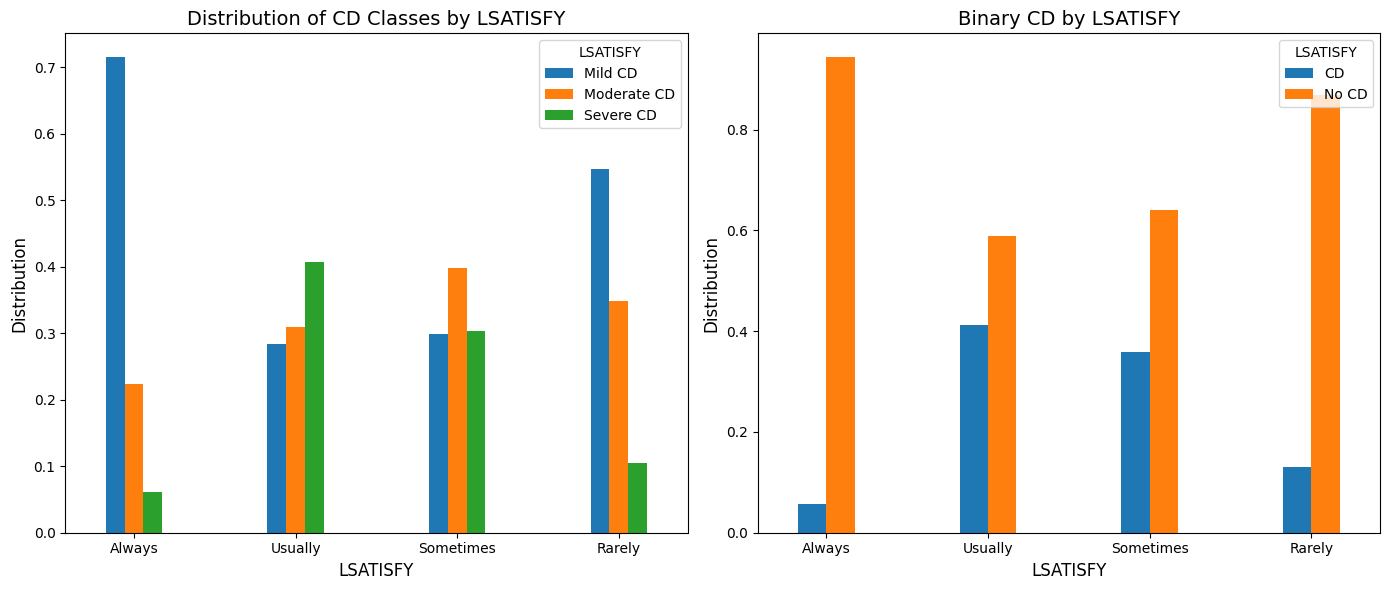

Cramers V for multi-class classification is: 0.23362112676031951
Cramers V for binary classification is: 0.2269980168594716


In [ ]:
# mapping = {1:"Very satisfied", 2: "satisfied", 3: "dissatisfied", 4:"Very dissatisfied",  7: "Not Sure", 9: "Refused"}
mapping = {1:"Always", 2: "Usually", 3: "Sometimes", 4: "Rarely", 7: "Not Sure", 9: "Refused"}
# mapping = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Asian', 5: 'Native Hawaiian', 6: 'American Indian', 7: 'Mixed', 8:'Others',
#             77: "Not Sure", 99: "Refused"}
# mapping = {1:"With medication", 2: "Without medication", 3: "Not under control, with medication", 4.0: "Not under control, with medication", 7: "Not Sure", 9: "Refused"}
feature = 'LSATISFY'

explore_cat(df, feature, mapping, include_refused=False)

In [ ]:
#@title Function for continuous variable exploration
def explore_cts(df, feature, none=88, not_sure=77, refused=99):
  subdf = df[[feature, 'Class']]
  print(f'There are {subdf[feature].isna().sum()} missing values, {np.sum(subdf[feature]==not_sure)} not sure values, {np.sum(subdf[feature]==refused)} refused values')

  if np.sum(~subdf[feature].isna()) == 0:
    print("No valid information")

  else:
    subdf.dropna(subset=[feature], inplace=True)
    subdf = subdf[~((subdf[feature]==not_sure) | (subdf[feature]==refused))]
    subdf[feature] = subdf[feature].replace(none, 0)

    desired_order = ['Mild CD', 'Moderate CD', 'Severe CD']
    desired_order2 = ['CD', 'No CD']

    subdf['Binary Classification'] = subdf['Class'].replace({'Mild CD':'CD', 'Moderate CD':'CD', 'Severe CD':'CD'})

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    sns.kdeplot(data=subdf[(subdf['Class']!='No CD')], x=feature, hue='Class', hue_order=desired_order,fill=True,
                common_norm=False, bw_adjust=2, ax=axes[0])
    axes[0].set_xlabel(f'{feature}', fontsize=12)
    axes[0].set_ylabel('Density', fontsize=12)
    axes[0].set_title(f'Distribution of {feature} within different CD classes', fontsize=14)
    axes[0].legend(title=f'{feature}', labels=desired_order, loc='upper right')

    sns.kdeplot(data=subdf, x=feature, hue='Binary Classification', hue_order=desired_order2,fill=True,
                common_norm=False, bw_adjust=2, ax=axes[1])
    axes[1].set_xlabel(f'{feature}', fontsize=12)
    axes[1].set_ylabel('Density', fontsize=12)
    axes[1].set_title(f'Distribution of {feature} with and without CD', fontsize=14)
    axes[1].legend(title=f'{feature}', labels=desired_order2, loc='upper right')

    plt.tight_layout()
    plt.show()

    groups = [group[feature] for name, group in subdf[(subdf['Class']!='No CD')].groupby('Class')]
    f_statistic, p_value = f_oneway(*groups)

    print("p-value for multi-class classification is:", p_value)

    groups2 = [group[feature] for name, group in subdf.groupby('Binary Classification')]
    f_statistic, p_value2 = f_oneway(*groups2)

    print("p-value for binary classification:", p_value2)



There are 54222 missing values, 456 not sure values, 45 refused values


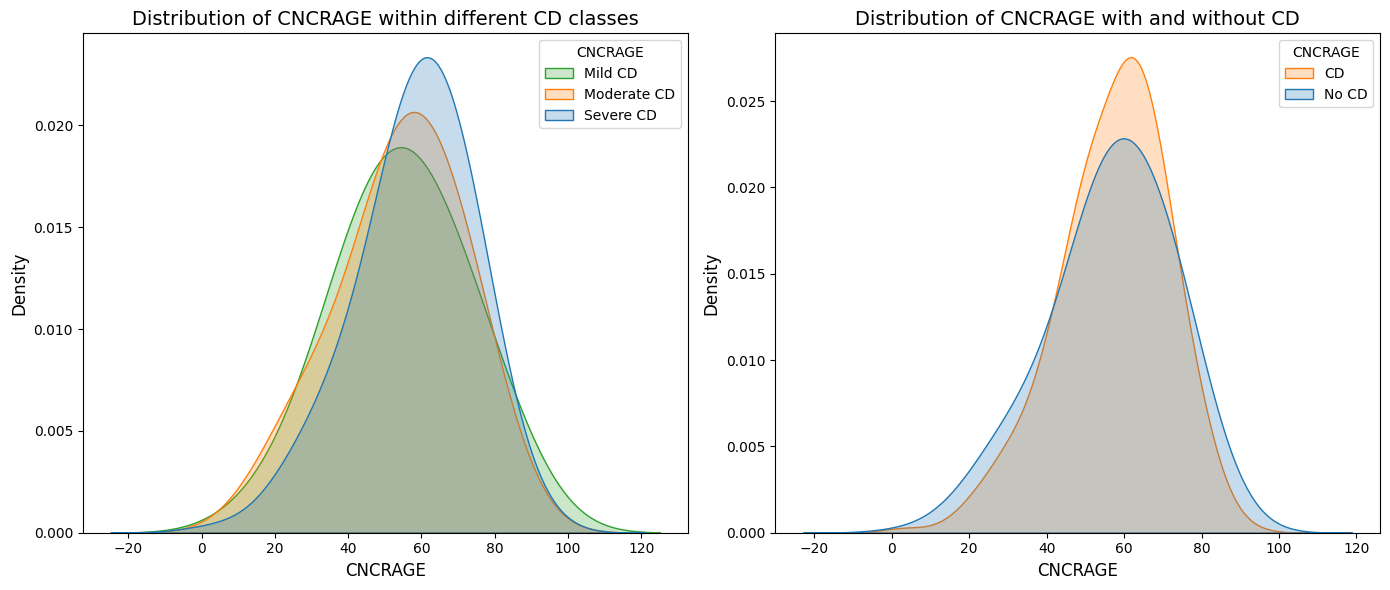

p-value for multi-class classification is: 0.0009094981677972742
p-value for binary classification: 0.3402684241516559


In [ ]:
feature = 'CNCRAGE';

explore_cts(df, feature, none=1000, not_sure=98, refused=99)

In [ ]:
from math import comb
comb(1000,2)

499500

In [ ]:
#@title previous years
# df2018.rename(columns={'SEX1': '_SEX'}, inplace=True)
# df2018.rename(columns={'_RACE': 'RRCLASS3'}, inplace=True)
# df2018.rename(columns={'_INCOMG': '_INCOMG1'}, inplace=True)
# df2018.rename(columns={'ADDEPEV2': 'ADDEPEV3'}, inplace=True)
# df2019.rename(columns={'_RACE': 'RRCLASS3'}, inplace=True)
# df2020.rename(columns={'_RACE': 'RRCLASS3'}, inplace=True)
# df2021.rename(columns={'_RACE': 'RRCLASS3'}, inplace=True)
# df2019.rename(columns={'_INCOMG': '_INCOMG1'}, inplace=True)
# df2020.rename(columns={'_INCOMG': '_INCOMG1'}, inplace=True)

In [ ]:
def sel_features(df, features):
  return df[features]

In [ ]:
def remove_blanks(df, column, unknown=7, refused=9):
  remove_idx = df[(df[column] == unknown) | (df[column] == refused)].index
  df2 = df.dropna(subset = [column])
  df2 = df2.drop(index=remove_idx)
  return df2

In [ ]:
df2019.head()

In [ ]:
mapping1 = {1: 'White', 2: 'Black', 3: 'American Indian', 4: 'Asian', 5: 'Native Hawaiian', 6: 'Others', 7: 'Mixed', 8: 'Hispanic'}
mapping2 = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Asian', 5: 'Native Hawaiian', 6: 'American Indian', 7: 'Mixed', 8:'Others'}

df2018 = remove_blanks(df2018, 'RRCLASS3', unknown=77)
df2019 = remove_blanks(df2019, 'RRCLASS3', unknown=77)
df2020 = remove_blanks(df2020, 'RRCLASS3', unknown=77)
df2021 = remove_blanks(df2021, 'RRCLASS3', unknown=77)
df2022 = remove_blanks(df2022, 'RRCLASS3', unknown=77, refused=99)

df2018.RRCLASS3 = df2018.RRCLASS3.map(mapping1)
df2019.RRCLASS3 = df2019.RRCLASS3.map(mapping1)
df2020.RRCLASS3 = df2020.RRCLASS3.map(mapping1)
df2021.RRCLASS3 = df2021.RRCLASS3.map(mapping1)
df2022.RRCLASS3 = df2022.RRCLASS3.map(mapping2)

In [ ]:
df2018 = remove_blanks(df2018, '_INCOMG1')
df2019 = remove_blanks(df2019, '_INCOMG1')
df2020 = remove_blanks(df2020, '_INCOMG1')
df2021 = remove_blanks(df2021, '_INCOMG1', unknown=77)
df2022 = remove_blanks(df2022, '_INCOMG1', unknown=77)


In [ ]:
df2021._INCOMG1 = df2021._INCOMG1.replace([6.0,7.0], 5.0)
df2022._INCOMG1 = df2022._INCOMG1.replace([6.0,7.0], 5.0)

In [ ]:
df_all = pd.concat([df2018, df2019, df2020, df2021, df2022], axis=0)
df_all.reset_index(drop=True, inplace=True)
df_all.shape

(210061, 26)

In [ ]:
def binary_process(df, column):
  remove_idx = df[(df[column] == 9) | (df[column] == 7)].index
  df2 = df.dropna(subset = [column])
  df2 = df2.drop(index=remove_idx)
  df2[column] = df2[column].astype(int)
  df2[column] = df2[column].replace(2, 0)
  return df2

In [ ]:
binary_columns = ['_SEX', 'DEAF', 'BLIND', 'DIFFWALK', 'DIFFDRES', 'DIFFALON',
                  'DECIDE', '_MICHD', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ADDEPEV3',
                  'SMOKE100', 'EXERANY2', 'CIMEMLOS']

nonbinary_columns = [col for col in df_all.columns if col not in binary_columns]

In [ ]:
for column in binary_columns:
  df_all = binary_process(df_all, column)

In [ ]:
for column in nonbinary_columns:
  print(column, df_all[column].unique())

_AGE80 [57. 61. 53. 69. 80. 73. 67. 60. 64. 75. 74. 72. 47. 52. 50. 59. 70. 65.
 56. 62. 51. 71. 46. 68. 55. 45. 66. 63. 76. 48. 77. 78. 49. 54. 79. 58.
 32. 44. 37. 35. 43. 27. 39. 40. 33. 42. 41. 38. 34. 36. 23.]
RRCLASS3 ['White' 'Hispanic' 'Asian' 'Black' 'Native Hawaiian' 'Mixed'
 'American Indian' 'Others']
_EDUCAG [3. 2. 4. 1. 9.]
_INCOMG1 [1. 2. 5. 3. 4.]
EMPLOY1 [ 8.  1.  7.  9.  3.  5.  2.  4.  6. nan]
GENHLTH [ 5.  2.  1.  3.  4.  7.  9. nan]
CDHOUSE [ 5. nan  3.  1.  2.  4.  7.  9.]
CDASSIST [ 5. nan  3.  4.  2.  1.  7.  9.]
CDHELP [nan  2.  1.  3.  4.  5.  7.  9.]
CDSOCIAL [ 4. nan  1.  5.  3.  2.  7.  9.]
CDDISCUS [ 2. nan  1.  7.  9.]


In [ ]:
df_all = remove_blanks(df_all, '_EDUCAG')
df_all = remove_blanks(df_all, 'EMPLOY1', unknown=77)
df_all = remove_blanks(df_all, 'GENHLTH')

In [ ]:
df_all.drop(columns=['CDHELP'], inplace=True)

In [ ]:
df_all.head()

In [ ]:
def OneHotEncoding(df):
  df2 = df.copy()
  one_hot_columns = df2.dtypes[df2.dtypes == 'object'].index.tolist()
  for column in one_hot_columns:
    one_hot_encoding = pd.get_dummies(df2[column], dtype='int')
    df2 = pd.concat([df2, one_hot_encoding], axis=1)
    df2.drop(columns=[column], inplace = True)
    if 'Missing' in df2.columns:
      df2.drop(columns=['Missing'], inplace = True)

  return df2

In [ ]:
df_all = OneHotEncoding(df_all)

In [ ]:
df_CD = df_all[df_all['CIMEMLOS'] == 1]
for col in ['CDHOUSE', 'CDASSIST', 'CDSOCIAL', 'CDDISCUS']:
  df_CD = remove_blanks(df_CD, col)
df_CD.shape

(19755, 32)

In [ ]:
df_for_binary = df_all.drop(columns=['CDHOUSE', 'CDASSIST', 'CDSOCIAL', 'CDDISCUS'])
df_for_binary.reset_index(drop=True, inplace=True)

In [ ]:
df_CD.shape

(19755, 32)

In [ ]:
df_all.to_csv(os.path.join(data_path, 'Data_all_0409.csv'), index=False)
df_CD.to_csv(os.path.join(data_path, 'Data_CD_0409.csv'), index=False)
df_for_binary.to_csv(os.path.join(data_path, 'Data_for_binary_0409.csv'), index=False)

In [ ]:
df_CD

,_SEX,_AGE80,_EDUCAG,_INCOMG1,EMPLOY1,GENHLTH,DEAF,BLIND,DIFFWALK,DIFFDRES,...,CDSOCIAL,CDDISCUS,American Indian,Asian,Black,Hispanic,Mixed,Native Hawaiian,Others,White
0,1,57.0,3.0,1.0,8.0,5.0,1,1,1,0,...,4.0,2.0,0,0,0,0,0,0,0,1
12,0,75.0,4.0,5.0,7.0,3.0,1,0,1,0,...,1.0,1.0,0,0,1,0,0,0,0,0
42,0,53.0,2.0,2.0,5.0,5.0,0,1,1,0,...,1.0,1.0,0,0,1,0,0,0,0,0
48,0,74.0,3.0,4.0,1.0,3.0,0,0,0,0,...,5.0,2.0,0,0,1,0,0,0,0,0
52,0,63.0,4.0,5.0,1.0,3.0,0,0,1,0,...,5.0,1.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209977,1,70.0,3.0,4.0,8.0,5.0,1,0,1,0,...,1.0,1.0,0,0,0,0,0,0,0,1
209985,0,52.0,2.0,1.0,4.0,4.0,0,0,1,1,...,1.0,1.0,0,0,0,0,0,0,0,1
209987,1,72.0,3.0,3.0,8.0,3.0,1,0,1,0,...,2.0,2.0,0,0,0,0,0,0,0,1
210017,1,51.0,3.0,5.0,1.0,4.0,0,1,0,0,...,4.0,1.0,0,0,0,0,0,0,0,1


In [ ]:
def get_binary_columns(df):
    binary_columns = []
    for column in df.columns:
        unique_values = df[column].unique()
        if len(unique_values) == 2:
            binary_columns.append(column)
    return binary_columns

# binary_columns = get_binary_columns(X)
# cont_columns = [column for column in X.columns if column not in binary_columns]

In [ ]:
X = df_for_binary.drop(columns=['CIMEMLOS'])
y = df_for_binary.CIMEMLOS

In [ ]:
from scipy.stats import pointbiserialr

cols = []
for col in X.columns:
  corr, _ = pointbiserialr(X[col], y)
  if abs(corr) > 0.2:
    cols.append(col)
  print(f"{col}: {corr}")


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
split=list(enumerate(skf.split(df_for_binary, df_for_binary.CIMEMLOS)))
folds={i[0]:i[1][1] for i in split}
train_idx = np.concatenate((folds[0], folds[1], folds[2], folds[3]))
# val_idx = folds[3]
test_idx =  folds[4]

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
split=list(enumerate(skf.split(df_for_binary, df_for_binary.Class)))
folds={i[0]:i[1][1] for i in split}
train_idx = np.concatenate((folds[0], folds[1], folds[2], folds[3]))
# val_idx = folds[3]
test_idx =  folds[4]

X_train = X.iloc[train_idx]
# X_val = X.iloc[val_idx]
X_test = X.iloc[test_idx]

y_train = y.iloc[train_idx]
# y_val = y.iloc[val_idx]
y_test = y.iloc[test_idx]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


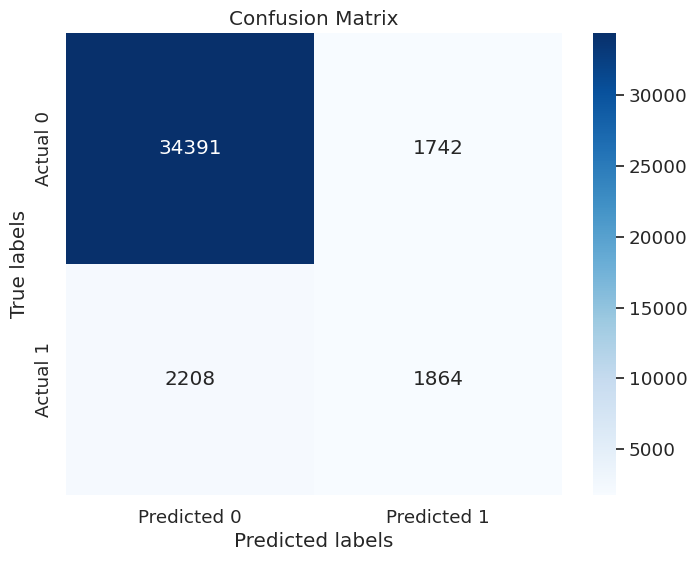

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight={0:0.3,1:0.7})
# clf = LogisticRegression(class_weight='balanced')

clf.fit(X_train, y_train)
# y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.3).astype(int)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

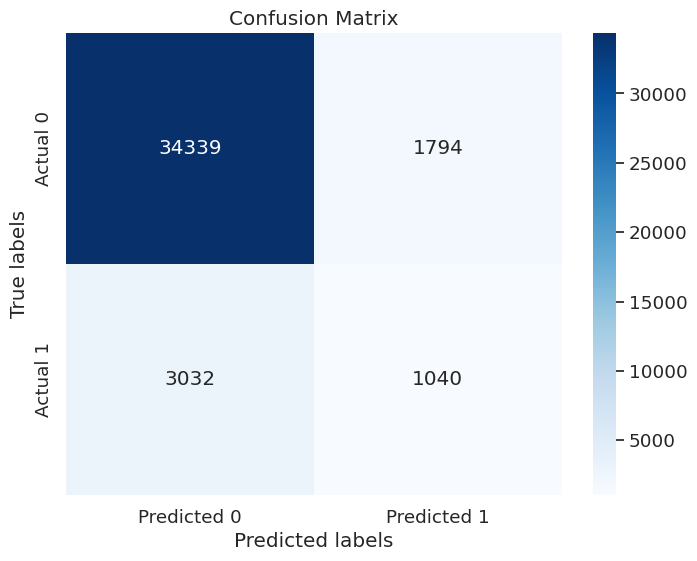

In [ ]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title MLP
import torch # torch

from torchvision import transforms # transform is used for data pre-processing
from torch.utils import data as Data
from torch.utils.data import Dataset # for dataset construction
from torch.utils.data import DataLoader

import torch.optim as optim

import numpy as np

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
XTrain = torch.from_numpy(X_train.values)
# XVal = torch.from_numpy(X_val.values)
XTest = torch.from_numpy(X_test.values)

yTrain = torch.from_numpy(y_train.values)
# yVal = torch.from_numpy(y_val.values)
yTest = torch.from_numpy(y_test.values)

In [ ]:
class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

train_dataset = MyDataset(XTrain, yTrain)
# val_dataset = MyDataset(XVal, yVal)
test_dataset = MyDataset(XTest, yTest)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(XTrain.shape[1], 128)
        # self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
model = SimpleMLP()

loss = nn.CrossEntropyLoss(weight=torch.tensor(sum(y_train)/(np.bincount(y_train)*2), dtype=torch.float32))
# loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for i in range(25):
  model.train()
  train_acc, val_acc = [], []

  true_labs, pred_labs = [], []
  for batch, (X, y) in enumerate(train_loader):
    X = X.float()
    optimizer.zero_grad()
    outputs = model(X)

    loss_value = loss(outputs, y)
    loss_value.backward()
    optimizer.step()

    y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
    y_true = y.cpu().numpy()

    true_labs.extend(y_true)
    pred_labs.extend(y_pred)

  train_acc.append(accuracy_score(true_labs, pred_labs))
  print(f'Epoch: [{i+1}/25]: training accuracy is {train_acc[-1]:.4f}')

  model.eval()
  true_labs, pred_labs = [], []
  for batch, (X, y) in enumerate(test_loader):
    X = X.float()
    outputs = model(X)

    y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
    y_true = y.cpu().numpy()
    true_labs.extend(y_true)
    pred_labs.extend(y_pred)

  val_acc.append(accuracy_score(true_labs, pred_labs))
  print(f'Epoch: [{i+1}/25]: validation accuracy is {val_acc[-1]:.4f}')

Epoch: [1/25]: training accuracy is 0.7626
Epoch: [1/25]: validation accuracy is 0.7652
Epoch: [2/25]: training accuracy is 0.7999
Epoch: [2/25]: validation accuracy is 0.7971
Epoch: [3/25]: training accuracy is 0.8222
Epoch: [3/25]: validation accuracy is 0.8206
Epoch: [4/25]: training accuracy is 0.8309
Epoch: [4/25]: validation accuracy is 0.8785
Epoch: [5/25]: training accuracy is 0.8331
Epoch: [5/25]: validation accuracy is 0.8242
Epoch: [6/25]: training accuracy is 0.8346
Epoch: [6/25]: validation accuracy is 0.7447
Epoch: [7/25]: training accuracy is 0.8333
Epoch: [7/25]: validation accuracy is 0.8174
Epoch: [8/25]: training accuracy is 0.8250
Epoch: [8/25]: validation accuracy is 0.8724
Epoch: [9/25]: training accuracy is 0.8382
Epoch: [9/25]: validation accuracy is 0.8482
Epoch: [10/25]: training accuracy is 0.8362
Epoch: [10/25]: validation accuracy is 0.8552
Epoch: [11/25]: training accuracy is 0.8392
Epoch: [11/25]: validation accuracy is 0.7757
Epoch: [12/25]: training acc

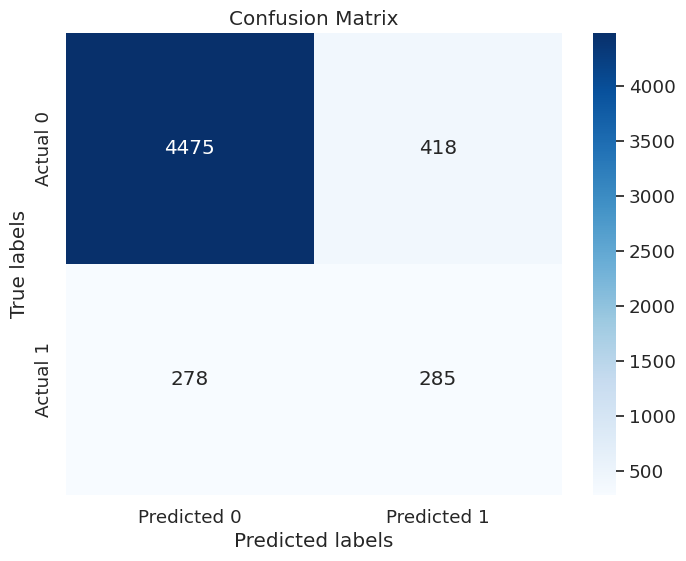

In [ ]:
conf_matrix = confusion_matrix(true_labs, pred_labs)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# data_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Data'
# df14.to_csv(os.path.join(data_path, 'Data_Xinya_0408.csv'), index=False)
# # os.listdir(data_path)

In [ ]:
# df=pd.read_csv('https://drive.google.com/uc?export=download&id=12KieiuP24jrrpTQqT4lj9L5iUXyr63s1')
